### 导数梯度

#### 导数

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 最初的设想
## numberical_diff: 数值微分
def numerical_diff(f, x):
    h = 10e-50  
    return (f(x + h) - f(x)) / h

def f(x):
    y = x**2
    return y

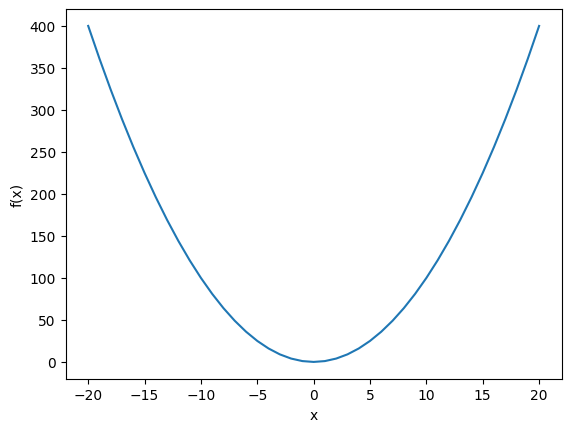

In [4]:
# 以1为单位，从-20到20生成数组
x = np.arange(-20.0, 21.0, 1) 
y = f(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()


In [6]:
# 计算x=10处的导数
# 对于f(x)=x^2，导数f'(x)=2x，因此在x=10处，导数应为20
numerical_diff(f, 10)

0.0

答案显然是不对的，这是因为产生了舍入误差（rounding error）

这是因为省略小数的精细部分的数值（比如，小数点后第8位以后的数值）而造成最终的计算结果上的误差

如果用float32类型（32位的浮点数）来表示1e-50，那么它会被表示为0.0，无法够精确地表示1e-50

也就是说，使用过小的值会造成计算机出现计算上的问题

所以我们将微小值h改为10e-4，即0.0001

另外，h不能无限接近0，为了减少误差

我们可以计算函数f(x + h) 和 （x - h）之间的差分

因为这种计算方法以x为中心，计算他左右两边的差分，所以也称
为中心差分（而（x+h）和x之间的差分称为前向差分）


In [7]:
def numerical_diff(f, x):
    h = 1e-4  # 10^-4
    return (f(x + h) - f(x - h)) / (2 * h)

In [8]:
numerical_diff(f, 10)

19.99999999995339

我们知道，$y = x^2$ 的导数是 $y = 2x$
x = 10, 其导数应为20
所以计算正确

#### 数学原理

差分公式从 $\frac{f(x+h)-f(x)}{h}$ 到 $\frac{f(x+h)-f(x-h)}{2h}$ 的数学原理总结

###### **1. 前向差分来自导数定义**

$f'(x)=\lim_{h \to 0}\frac{f(x+h)-f(x)}{h}$

这是导数最原始的定义，误差量级为 **O(h)**。

***

###### **2. 中心差分是构造出来的更高精度近似**

$ \frac{f(x+h)-f(x-h)}{2h} $

不是导数的定义，而是为了**提高精度**而设计的一种数值近似方法。

它的误差量级是 **O(h²)**，精度比前向差分高一个数量级。

***

###### **3. 关键数学原理：泰勒展开使偶次项抵消**

用泰勒级数在点 x 展开：

###### **(1) 展开 f(x+h)**


$f(x+h)=f(x)+hf'(x)+\frac{h^2}{2}f''(x)+\frac{h^3}{6}f^{(3)}(x)+O(h^4)$


###### **(2) 展开 f(x-h)**

$f(x-h)=f(x)-hf'(x)+\frac{h^2}{2}f''(x)-\frac{h^3}{6}f^{(3)}(x)+O(h^4)$

###### **两式相减**

$f(x+h)-f(x-h)=2hf'(x)+\frac{h^3}{3}f^{(3)}(x)+O(h^5)$

###### **两边除以 2h:**

$\frac{f(x+h)-f(x-h)}{2h}=f'(x)+O(h^2)$

🌟 **关键点：偶次项（h²，h⁴…）完全抵消了！**

这就是中心差分比前向差分更准的数学原因。

因此得到：

$\frac{f(x+h)-f(x-h)}{2h}=f'(x)+O(h^2)$

这是中心差分高精度的核心原因。

***

###### ⭐ 最简一句话总结

**中心差分比前向差分更准，因为泰勒展开中偶次误差项相互抵消，使误差从 O(h) 提升到 O(h²)。拉格朗日中值定理可以辅助理解，但不是核心推导工具。**

#### 偏导数

多元方程如：

$ y = {x_0}^2 + {x_1}^2 $

代码可以表示为：

In [10]:
def f_2(x):
    return x[0]**2 + x[1]**2

问题1: 求$x_0 = 3$, $x_1 = 4$时，关于$x_0$的偏导数 $ \frac{\partial f}{\partial x_0} $

In [12]:
def function_tmp1(x0):
    return x0**2 + 4.0**2

numerical_diff(function_tmp1, 3.0)

6.00000000000378

问题2: 求$x_0 = 3$, $x_1 = 4$时，关于$x_1$的偏导数 $ \frac{\partial f}{\partial x_1} $

In [14]:
def function_tmp2(x1):
    return 3.0**2 + x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119

#### 梯度(gradient)

上面我们分别计算了 $ \frac{\partial f}{\partial x_0} $ 和 $ \frac{\partial f}{\partial x_1} $，这两个偏导数合在一起，就是梯度（gradient）

梯度实现的代码

In [15]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # 生成一个与x形状相同的数组[0, 0]，用以存放梯度

    # 使用for循环求取每一个维度(x0, x1, x2, ...)的梯度
    for idx in range(x.size): #如X[3, 4], idx=0,1
        
        tmp_val = x[idx] # tmp_val = x[0] = 3
        x[idx] = tmp_val + h  # x[0]=3+h, x变为[3+h,4]
        fxh1 = f(x) # 算[3+h,4]对应的f

        x[idx] = tmp_val - h # x[0]=3-h, x变为[3-h,4]
        fxh2 = f(x) # 算[3-h,4]对应的f
        grad[idx] = (fxh1 - fxh2) / (2 * h)  # 计算梯度
        
        x[idx] = tmp_val  # 还原值为3, x变回[3,4]

    return grad

其中：
numerical_gradient(f_2, np.array([3.0, 4.0]))

In [16]:
numerical_gradient(f_2, np.array([3.0, 4.0]))

array([6., 8.])

可以看到，$y = {x_0}^2 + {x_1}^2$ 在 $(x_0 = 3, x_1 = 4)$ 处的梯度为 $[6.0, 8.0]$，即 $ \frac{\partial f}{\partial x_0} = 6.0 $ 和 $ \frac{\partial f}{\partial x_1} = 8.0 $。

梯度指示的方向是各点处的函数值减小最多的方向

注：方向导数 = 梯度的模 * $cos(\theta)$ ($\theta$ 是方向导数的方向 与 梯度方向的夹角)

但无法保证梯度所指的方向就是函数的最小值或者真正应该前进的方向

#### 使用梯度法找到损失函数的最小值

##### 一个对梯度法的比喻

假设你蒙着眼睛在广袤的大地上行走

你的目的地是找到这片大地上最低的点

你没有地图，也没有任何指引

你所能依靠的，只有感受脚下地面的坡度

虽然坡度的方向并不一定指向最低点，但沿着他的方向能够最大限度第降低自己的海平面距离

以坡度为线索来走向最深的坑，这种方法就引出了我们的梯度法(gradient method)
